# Question 1

Create a CSV file for the above training data and write a Python function program to find the fitted linear
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with
your program. Compute the error, MSE and RMSE. Plot the graph Daughter height (Y-axis) vs Mother height
(X-axis) with blue colour. Also, plot the line of best fit with red colour. Predict her daughterâ€™s height with
given a new mother height as 63. Plot the graph of error in y-axis and iteration in x-axis with 4 epochs (6x4=24
iterations).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('heights.csv')
X = data[['mother_height']].values
y = data['daughter_height'].values

data

,mother_height,daughter_height
0,60,62
1,62,64
2,64,66
3,66,68
4,68,70
5,70,72
6,72,74
7,74,76
8,76,78
9,78,80


In [3]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized, mean, std

def unstandardize(X_standardized, mean, std):
    X_unstandardized = X_standardized * std + mean
    return X_unstandardized

X_standardized, X_mean, X_std = standardize(X)


In [4]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(len(X) * (1 - test_size))
    train_indices, test_indices = indices[:split_index], indices[split_index:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)


In [5]:
def gradient_descent(X, y, learning_rate=0.001, epochs=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(2, 1)
    y = y.reshape(-1, 1)

    for epoch in range(epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
        
        if np.any(np.isnan(theta)) or np.any(np.isinf(theta)):
            print(f"NaN or Inf detected at epoch {epoch}")
            break

    return theta


In [7]:
learning_rate = 0.001
epochs = 1000

theta = gradient_descent(X_train, y_train, learning_rate, epochs)
intercept, slope = theta[0][0], theta[1][0]

print(f"Gradient Descent Coefficients:\nIntercept: {intercept}\nSlope: {slope}")


Gradient Descent Coefficients:
Intercept: 61.44810748515938
Slope: 5.300439610149634


In [8]:
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
y_test_pred = X_test_b.dot(theta)

mse = np.mean((y_test - y_test_pred.flatten()) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 91.29244478000933
Root Mean Squared Error: 9.554707990305582


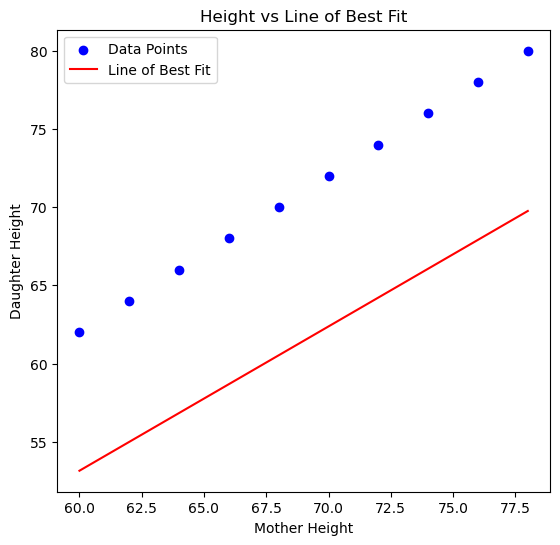

In [9]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['mother_height'], data['daughter_height'], color='blue', label='Data Points')

X_line = np.linspace(data['mother_height'].min(), data['mother_height'].max(), 100).reshape(-1, 1)
X_line_standardized = (X_line - X_mean) / X_std
X_line_b = np.c_[np.ones((X_line_standardized.shape[0], 1)), X_line_standardized]

y_line = X_line_b.dot(theta)

plt.plot(X_line, y_line, color='red', label='Line of Best Fit')
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Height vs Line of Best Fit')
plt.legend()


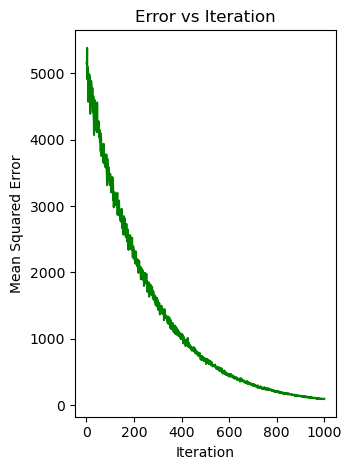

In [10]:
errors = []
for epoch in range(1, epochs + 1):
    theta = gradient_descent(X_train, y_train, learning_rate, epoch)
    X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
    y_pred_train = X_b_train.dot(theta)
    error = np.mean((y_pred_train - y_train.reshape(-1, 1))**2)
    errors.append(error)

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), errors, color='green')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Error vs Iteration')

plt.tight_layout()
plt.show()


In [11]:
new_mother_height = np.array([[63]])
new_mother_height_standardized = (new_mother_height - X_mean) / X_std
new_mother_height_b = np.c_[np.ones((new_mother_height_standardized.shape[0], 1)), new_mother_height_standardized]
predicted_daughter_height = new_mother_height_b.dot(theta)[0][0]
print(f"Predicted Daughter's Height for Mother Height {new_mother_height[0][0]}: {predicted_daughter_height}")


Predicted Daughter's Height for Mother Height 63: 55.63216772800946


# Question 2

Create a CSV file for the above training data and write a Python function program to find the fitted logistic
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with
your program. Compute the predicted y and assign the class label (prediction = 0 IF p(fail) < 0.5 and prediction
= 1 IF p(pass) >= 0.5) and compute the accuracy. Find the error for each iteration and predict the probability
that a student will pass the exam if they study for a) 3.5 hours b) 7.5 hours. Plot the graph of error in y-axis
and iteration in x-axis with 3 epochs (8x3=24 iterations).

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
hours_of_study = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
pass_status = np.array([0, 0, 0, 0, 1, 1, 1, 1])

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, alpha, epochs):
    m = len(y)
    theta = np.zeros(X.shape[1])
    intercept = 0
    errors = []

    for epoch in range(epochs):
        z = np.dot(X, theta) + intercept
        predictions = sigmoid(z)
        error = - (1/m) * np.sum(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
        errors.append(error)
        gradient_theta = (1/m) * np.dot(X.T, (predictions - y))
        gradient_intercept = (1/m) * np.sum(predictions - y)
        theta -= alpha * gradient_theta
        intercept -= alpha * gradient_intercept
    return theta, intercept, errors

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(hours_of_study)

In [16]:
alpha = 0.1
epochs = 24
theta, intercept, errors = gradient_descent(X_scaled, pass_status, alpha, epochs)

In [17]:
print("Gradient Descent Coefficients:", theta)
print("Gradient Descent Intercept:", intercept)

Gradient Descent Coefficients: [0.80521209]
Gradient Descent Intercept: 8.326672684688675e-18


In [18]:
def predict_probabilities(X, theta, intercept):
    z = np.dot(X, theta) + intercept
    return sigmoid(z)

def predict_class(probabilities):
    return (probabilities >= 0.5).astype(int)

probabilities = predict_probabilities(X_scaled, theta, intercept)
predictions = predict_class(probabilities)

In [19]:
accuracy = np.mean(predictions == pass_status)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [20]:
test_hours = np.array([3.5, 7.5]).reshape(-1, 1)
test_hours_scaled = scaler.transform(test_hours)
test_probabilities = predict_probabilities(test_hours_scaled, theta, intercept)
print("Probability of passing with 3.5 hours:", test_probabilities[0])
print("Probability of passing with 7.5 hours:", test_probabilities[1])

Probability of passing with 3.5 hours: 0.4130373007834765
Probability of passing with 7.5 hours: 0.7415940326348259


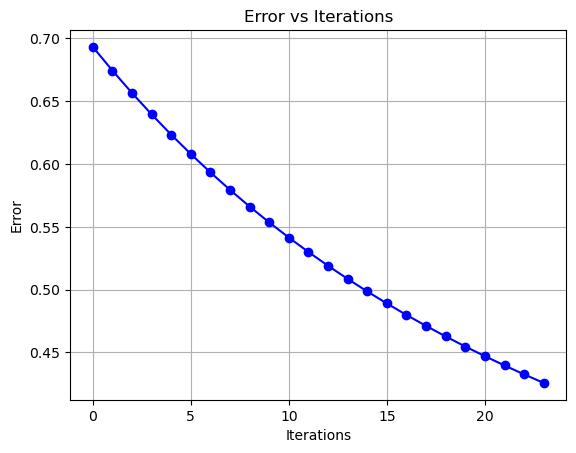

In [21]:
plt.plot(range(epochs), errors, color='blue', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs Iterations')
plt.grid(True)
plt.show()

# Question 3


Consider the above dataset with two independent variables (X1 and X2) and a dependent variable (Y).
Implement in python, how you can perform the logistic regression to model the relationship between the
independent variables and the dependent variable.

In [31]:
import numpy as np
from scipy.special import expit


In [30]:
X1 = np.array([[4, 1], [8, -14], [1, 0], [3, 2], [1, 4], [6, 7]])
y1 = np.array([1, 0, 1, 0, 0, 0])


In [32]:
def sigmoid(z1):
    return expit(z1)


In [29]:
def cost_function(X1, y1, theta, intercept):
    m1 = len(y1)
    z1 = np.dot(X1, theta) + intercept
    predictions = sigmoid(z1)
    cost = - (1/m1) * np.sum(y1 * np.log(predictions + 1e-10) + (1 - y1) * np.log(1 - predictions + 1e-10))
    return cost


In [35]:
def gradient_descent(X1, y1, alpha, epochs):
    m1, n1 = X.shape
    theta1 = np.zeros(n1)
    intercept = 0
    costs = []

    for _ in range(epochs):
        z1 = np.dot(X1, theta1) + intercept
        predictions = sigmoid(z1)
        error = predictions - y1
        cost = cost_function(X1, y1, theta1, intercept)
        costs.append(cost)
        gradient_theta = (1/m1) * np.dot(X1.T, error)
        gradient_intercept = (1/m1) * np.sum(error)
        theta1 -= alpha * gradient_theta
        intercept -= alpha * gradient_intercept
    return theta1, intercept, costs


In [36]:
alpha = 0.01
epochs = 1000
theta1, intercept, costs = gradient_descent(X1, y1, alpha, epochs)
print("Custom Logistic Regression Coefficients:", theta1)
print("Custom Logistic Regression Intercept:", intercept)


Custom Logistic Regression Coefficients: [-0.33142516 -0.05538593]
Custom Logistic Regression Intercept: 0.3366451923042207


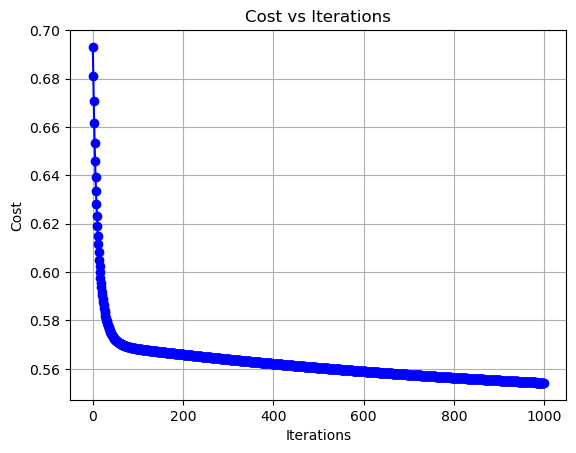

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), costs, color='blue', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.grid(True)
plt.show()
